<a href="https://colab.research.google.com/github/Boutayna-el/VMI_Self-Supervised_TP/blob/main/Self_Supervised_Learning_Demos_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# References

[Course Webpage](https://sites.google.com/view/berkeley-cs294-158-sp20/home)

[1] Pathak, Deepak, et al. "Context encoders: Feature learning by inpainting." Proceedings of the IEEE conference on computer vision and pattern recognition. 2016.

[2] Gidaris, Spyros, Praveer Singh, and Nikos Komodakis. "Unsupervised representation learning by predicting image rotations." arXiv preprint arXiv:1803.07728 (2018).

[3] Chen, Ting, et al. "A simple framework for contrastive learning of visual representations." arXiv preprint arXiv:2002.05709 (2020).

[4] Noroozi, Mehdi, and Paolo Favaro. "Unsupervised learning of visual representations by solving jigsaw puzzles." European Conference on Computer Vision. Springer, Cham, 2016.

[5] Wang, Xiaolong, Allan Jabri, and Alexei A. Efros. "Learning correspondence from the cycle-consistency of time." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2019.

[6] Oord, Aaron van den, Yazhe Li, and Oriol Vinyals. "Representation learning with contrastive predictive coding." arXiv preprint arXiv:1807.03748 (2018).

[7] Hénaff, Olivier J., et al. "Data-efficient image recognition with contrastive predictive coding." arXiv preprint arXiv:1905.09272 (2019).

[8] Tian, Yonglong, Dilip Krishnan, and Phillip Isola. "Contrastive multiview coding." arXiv preprint arXiv:1906.05849 (2019).

[9] He, Kaiming, et al. "Momentum contrast for unsupervised visual representation learning." arXiv preprint arXiv:1911.05722 (2019).

[10] Doersch, Carl, Abhinav Gupta, and Alexei A. Efros. "Unsupervised visual representation learning by context prediction." Proceedings of the IEEE International Conference on Computer Vision. 2015.

[11] Ronneberger, Olaf, Philipp Fischer, and Thomas Brox. "U-net: Convolutional networks for biomedical image segmentation." International Conference on Medical image computing and computer-assisted intervention. Springer, Cham, 2015.

# Getting Started
Go to **Runtime -> Change runtime type** and make sure **Hardward accelerator** is set to **GPU**

In [1]:
!if [ -d cs294-158-ssl ]; then rm -Rf cs294-158-ssl; fi
!git clone https://github.com/ckurtz/cs294-158-ssl
!pip install cs294-158-ssl/

import os
os.chdir('cs294-158-ssl')

Cloning into 'cs294-158-ssl'...
remote: Enumerating objects: 615, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 615 (delta 92), reused 90 (delta 90), pack-reused 517 (from 1)
Receiving objects: 100% (615/615), 3.10 MiB | 6.79 MiB/s, done.
Resolving deltas: 100% (442/442), done.
Processing ./cs294-158-ssl
  Preparing metadata (setup.py) ... done
  Created wheel for deepul_helper: filename=deepul_helper-0.1.0-py3-none-any.whl size=25320 sha256=57ef02203ac266e39d5358e3dd1f922aab74b4cd24a344091fe2c13975fed14c
  Stored in directory: /root/.cache/pip/wheels/89/df/de/2522718f33fc5fb5d513646711c5929b728d06ba7f1c0aaaae
Successfully built deepul_helper


Run the cells below to download the necessary pretrained models. It should take a few minutes.

In [2]:
!wget https://camille-kurtz.com/teaching/data.zip
!unzip -qq data.zip
!rm data.zip

--2025-11-02 16:54:45--  https://camille-kurtz.com/teaching/data.zip
Resolving camille-kurtz.com (camille-kurtz.com)... 213.186.33.3
Connecting to camille-kurtz.com (camille-kurtz.com)|213.186.33.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4227668031 (3.9G) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   3.94G  17.8MB/s    in 3m 59s  

2025-11-02 16:58:45 (16.8 MB/s) - ‘data.zip’ saved [4227668031/4227668031]



In [3]:
!wget https://camille-kurtz.com/teaching/results.zip
!unzip -qq results.zip
!rm results.zip

--2025-11-02 16:59:31--  https://camille-kurtz.com/teaching/results.zip
Resolving camille-kurtz.com (camille-kurtz.com)... 213.186.33.3
Connecting to camille-kurtz.com (camille-kurtz.com)|213.186.33.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2636425194 (2.5G) [application/zip]
Saving to: ‘results.zip’

results.zip         100%[===================>]   2.46G  10.2MB/s    in 2m 21s  

2025-11-02 17:01:53 (17.9 MB/s) - ‘results.zip’ saved [2636425194/2636425194]



The models and demos shown were pre-trained. The code used for all the demos can be found in the github repo [here](https://github.com/wilson1yan/cs294-158-ssl). Follow the README to train models on CIFAR10 or ImageNet.

# Self-Supervised Learning Tasks
Self-supervised learning is a rapidly growing field, its success largely accelerated by growing compute and the vast amount of unlabeled data available for training. The hope is that by pretraining on specially designed self-supervised tasks, the models would be able to learn semantically meaningful representations to be used for downstream tasks. In the following demos, we will look at a few examples of these self-supervised tasks.

In [4]:
from deepul_helper.demos import load_model_and_data, evaluate_accuracy, display_nearest_neighbors, show_context_encoder_inpainting

%matplotlib inline

## Demo 1: Context Encoder [[1]](https://arxiv.org/abs/1604.07379)

The context encoder structures its self-supervised learning task by inpainting masked images. For example, the figure below shows different masking shapes, such as center masking, random block masking, and segmentation masking. Note that segmentation masking (c) is not purely self-supervised since we would need to train a image segmentation model which requires labels. However, the other two masking schemes (a) and (b) and purely self-supervised.

![](https://drive.google.com/uc?id=1fhzkULYTtyMGUUF2n9dlPayJSdcY5pRv)

More formally, the context encoder optimizes the following reconstruction loss:
$$\mathcal{L}_{rec} = \left\Vert \hat{M} \odot (x - F((1 - \hat{M})\odot x)) \right\Vert^2_2$$
where $\hat{M}$ is the masked region, $x$ is the image, and $F$ is the context encoder that tries to reconstruct the masked portion. In addition to the reconstruction loss, the paper introduces an adversarial loss that encourages more realistic inpaintings.
$$L_{adv} = \max_D \mathbb{E}_{x\in \chi} [\log(D(x)) + \log(1 - D(F((1-\hat{M})\odot x)))]$$
However, this demo does not use the adversarial portion of the loss.

### Example Code

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class ContextEncoder(nn.Module):
    metrics = ['Loss']
    metrics_fmt = [':.4e']

    def __init__(self, dataset, n_classes):
        super().__init__()
        input_channels = 3

        self.latent_dim = 4000

        # Encodes the masked image
        self.encoder = nn.Sequential(
            # 128 x 128 Input
            nn.Conv2d(input_channels, 64, 4, stride=2, padding=1), # 64 x 64
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 64, 4, stride=2, padding=1), # 32 x 32
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, stride=2, padding=1), # 16 x 16
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, stride=2, padding=1), # 8 x 8
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, stride=2, padding=1), # 4 x 4
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, self.latent_dim, 4) # 1 x 1
        )

        # Only reconstructs the masked part of the image and not the whole image
        self.decoder = nn.Sequential(
           nn.BatchNorm2d(self.latent_dim),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(self.latent_dim, 512, 4, stride=1, padding=0), # 4 x 4
           nn.BatchNorm2d(512),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1), # 8 x 8
           nn.BatchNorm2d(256),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1), # 16 x 16
           nn.BatchNorm2d(128),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1), # 32 x 32
           nn.BatchNorm2d(64),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(64, input_channels, 4, stride=2, padding=1), # 64 x 64
           nn.Tanh()
        )

        self.dataset = dataset
        self.n_classes = n_classes

    def construct_classifier(self):
        classifier = nn.Sequential(
            nn.Flatten(),
            nn.BatchNorm1d(self.latent_dim, affine=False),
            nn.Linear(self.latent_dim, self.n_classes)
        )
        return classifier

    def forward(self, images):
        # Extract a 64 x 64 center from 128 x 128 image
        images_center = images[:, :, 32:32+64, 32:32+64].clone()
        images_masked = images.clone()
        # Mask out a 64 x 64 center with slight overlap
        images_masked[:, 0, 32+4:32+64-4, 32+4:32+64-4] = 2 * 117.0/255.0 - 1.0
        images_masked[:, 1, 32+4:32+64-4, 32+4:32+64-4] = 2 * 104.0/255.0 - 1.0
        images_masked[:, 2, 32+4:32+64-4, 32+4:32+64-4] = 2 * 123.0/255.0 - 1.0

        z = self.encoder(images_masked)
        center_recon = self.decoder(z)

        return dict(Loss=F.mse_loss(center_recon, images_center)), torch.flatten(z, 1)

    def encode(self, images):
        images_masked = images
        images_masked[:, 0, 32+4:32+64-4, 32+4:32+64-4] = 2 * 117.0/255.0 - 1.0
        images_masked[:, 1, 32+4:32+64-4, 32+4:32+64-4] = 2 * 104.0/255.0 - 1.0
        images_masked[:, 2, 32+4:32+64-4, 32+4:32+64-4] = 2 * 123.0/255.0 - 1.0
        return self.encoder(images_masked)

    def reconstruct(self, images):
        images_center = images[:, :, 32:32+64, 32:32+64].clone()
        images_masked = images.clone()
        images_masked[:, 0, 32+4:32+64 - 4, 32+4:32+64-4] = 2 * 117.0/255.0 - 1.0
        images_masked[:, 1, 32+4:32+64 - 4, 32+4:32+64-4] = 2 * 104.0/255.0 - 1.0
        images_masked[:, 2, 32+4:32+64 - 4, 32+4:32+64-4] = 2 * 123.0/255.0 - 1.0

        z = self.encoder(images_masked)
        center_recon = self.decoder(z)

        images_recon = images_masked.clone()
        images_recon[:, :, 32:32+64, 32:32+64] = center_recon
        return images_masked, images_recon


### Inpainting Examples
For each pair of images, the left image is the masked input and the right the inpainted reconstruction.

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


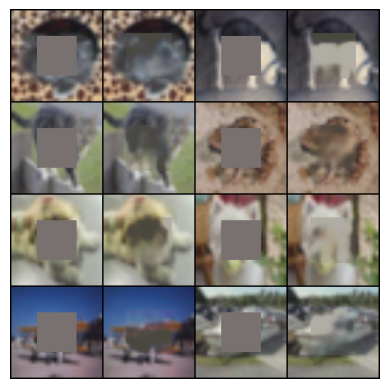

In [6]:
show_context_encoder_inpainting()

### Linear Classification
By design the model architecture is an encoder -> decoder module. We can use the bottleneck layer as our learned representation. Below, we show linear classification accuracy results on CIFAR10 using the learned representations.

In [7]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('context_encoder')
evaluate_accuracy(model, linear_classifier, train_loader, test_loader)

Train Set
Top 1 Accuracy: 53.236, Top 5 Accuracy: 94.094

Test Set
Top 1 Accuracy: 45.77, Top 5 Accuracy: 90.29



### Nearest Neighbors
Another way to evaluate our learned representation is to look at nearest neighbors to random encoded images in latent space.

Image 1


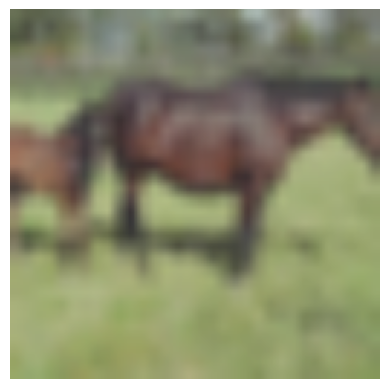

Top 16 Nearest Neighbors (in latent space)


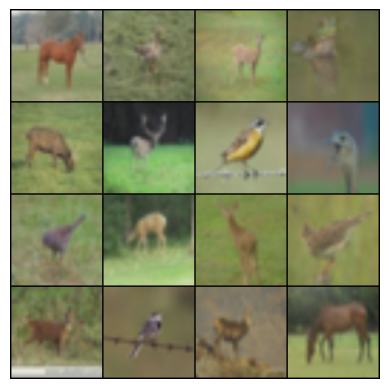

Image 2


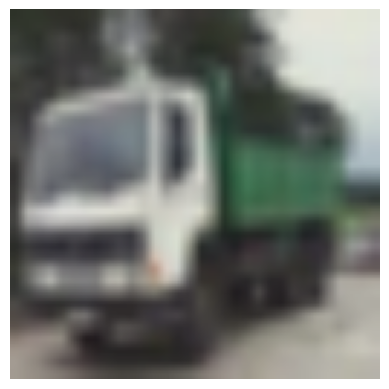

Top 16 Nearest Neighbors (in latent space)


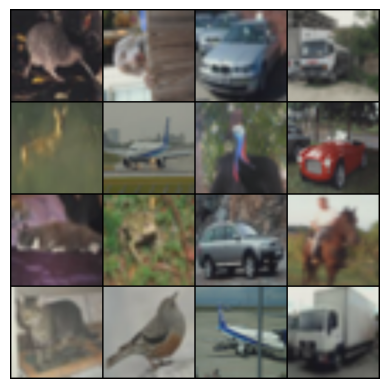

Image 3


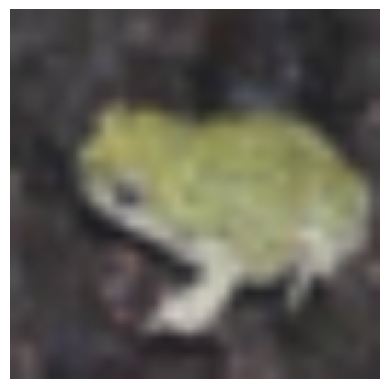

Top 16 Nearest Neighbors (in latent space)


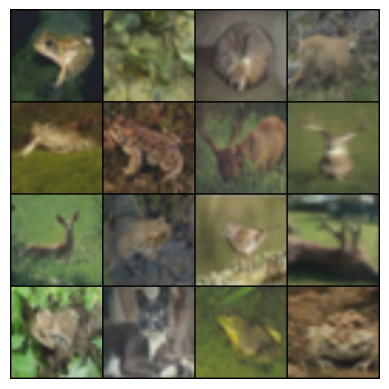

Image 4


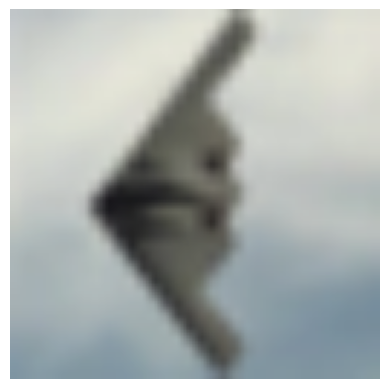

Top 16 Nearest Neighbors (in latent space)


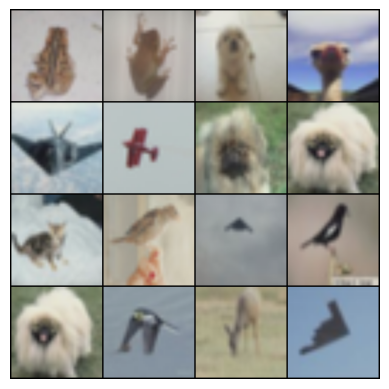

In [8]:
display_nearest_neighbors('context_encoder', model, test_loader)

## Demo 2: Rotation Prediction [[2]](https://arxiv.org/abs/1803.07728)

In this paper, the authors show that accurately predicting the degrees of rotation in images is a self-supervised learning task that learns good representations for downstream tasks.

![](https://drive.google.com/uc?id=1eHXLH-N_6uMGRzdf1Wjnga26qlS5-FRv)

More specifically, the authors showed that training a common CNN architecture (AlexNet, ResNet) on the rotation task learns semantically interpretable convolutional masks similar to those learned in supervised learning.

### Example Code

In [9]:
import math

import torch
import torch.nn as nn
import torch.nn.functional as F


class RotationPrediction(nn.Module):
    metrics = ['Loss', 'Acc1']
    metrics_fmt = [':.4e', ':6.2f']

    def __init__(self, dataset, n_classes):
        super().__init__()
        if dataset == 'cifar10':
            self.model = NetworkInNetwork()
            self.latent_dim = 192 * 8 * 8
            self.feat_layer = 'conv2'
        elif 'imagenet' in dataset:
            self.model = AlexNet()
            self.latent_dim = 256 * 13 * 13
            self.feat_layer = 'conv5'
        else:
            raise Exception('Unsupported dataset:', dataset)
        self.dataset = dataset
        self.n_classes = n_classes

    def construct_classifier(self):
        if self.dataset == 'cifar10':
            classifier = nn.Sequential(
                Flatten(),
                nn.BatchNorm1d(self.latent_dim, affine=False),
                nn.Linear(self.latent_dim, self.n_classes)
            )
        elif 'imagenet' in self.dataset:
            classifier = nn.Sequential(
                nn.AdaptiveMaxPool2d((6, 6)),
                nn.BatchNorm2d(256, affine=False),
                Flatten(),
                nn.Linear(256 * 6 * 6, self.n_classes)
            )
        else:
            raise Exception('Unsupported dataset:', dataset)
        return classifier

    def forward(self, images):
        batch_size = images.shape[0]
        images, targets = self._preprocess(images)
        targets = targets.to(images.get_device())

        logits, zs = self.model(images, out_feat_keys=('classifier', self.feat_layer))
        loss = F.cross_entropy(logits, targets)

        pred = logits.argmax(dim=-1)
        correct = pred.eq(targets).float().sum()
        acc = correct / targets.shape[0] * 100.

        return dict(Loss=loss, Acc1=acc), zs[:batch_size]

    def encode(self, images):
        zs = self.model(images, out_feat_keys=(self.feat_layer,))
        return zs

    def _preprocess(self, images):
        batch_size = images.shape[0]
        images_90 = torch.flip(images.transpose(2, 3), (2,))
        images_180 = torch.flip(images, (2, 3))
        images_270 = torch.flip(images, (2,)).transpose(2, 3)
        images_batch = torch.cat((images, images_90, images_180, images_270), dim=0)
        targets = torch.arange(4).long().repeat(batch_size)
        targets = targets.view(batch_size, 4).transpose(0, 1)
        targets = targets.contiguous().view(-1)
        return images_batch, targets

### Linear Classification
We can use the feature maps in the later convolutional layers of the pretrained model as our learned representation for linear classification.

In [10]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('rotation')
evaluate_accuracy(model, linear_classifier, train_loader, test_loader)

Train Set
Top 1 Accuracy: 79.27, Top 5 Accuracy: 99.244

Test Set
Top 1 Accuracy: 79.91, Top 5 Accuracy: 99.12



### Nearest Neighbors
Another way to evaluate our learned representation is to look at nearest neighbors to random encoded images in latent space.

Image 1


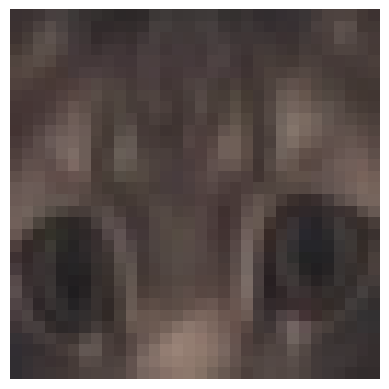

Top 16 Nearest Neighbors (in latent space)


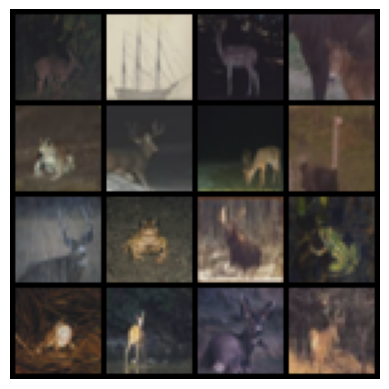

Image 2


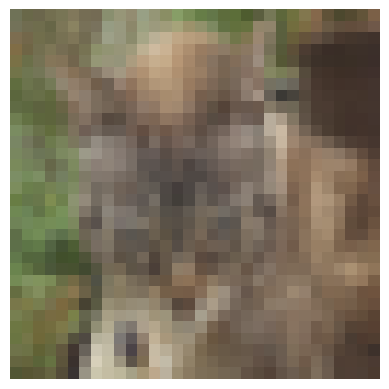

Top 16 Nearest Neighbors (in latent space)


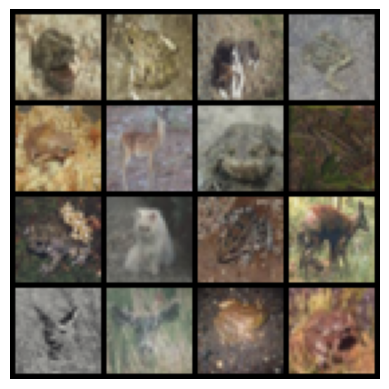

Image 3


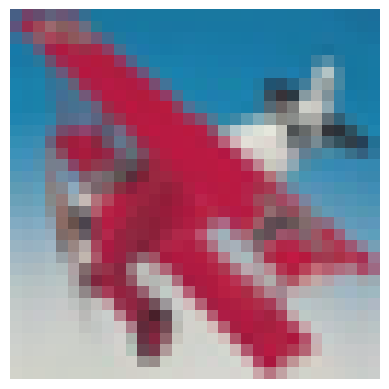

Top 16 Nearest Neighbors (in latent space)


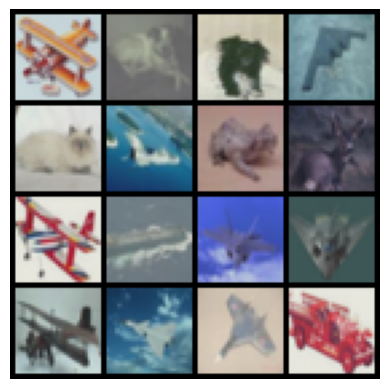

Image 4


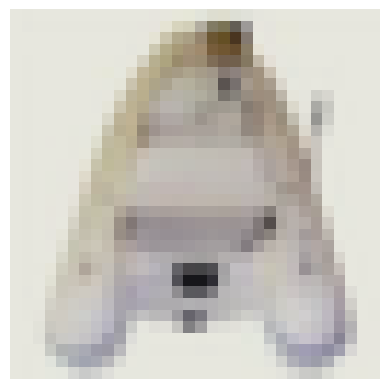

Top 16 Nearest Neighbors (in latent space)


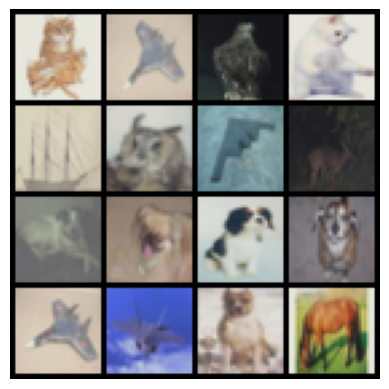

In [11]:
display_nearest_neighbors('rotation', model, test_loader)

## Demo 3: SimCLR [[3]](https://arxiv.org/abs/2002.05709)

SimCLR is a contrastive learning framework to learn strong visual representations. An image $x$ is processed using data augmentation to produce two variants $x_i$ and $x_j$ which are both fed into encoder $f$ (a CNN) and projection head $g$ (a small MLP). The models optimize a contrastive loss to maximally align projected latents $z_i, z_j$. We consider $x_i, x_j$ as a positive pair, and any other $x_i, x_k$ pairs (i.e. different images in the same batch) are negative pairs. A visual diagram of the training procedure is shown below (from the paper).

![](https://drive.google.com/uc?id=1XW1uIkUTMSa0DZncivSYXzM5gA5FIhF6)

More formally, the loss between positive example $z_i, z_j$ is:
$$\ell_{i,j} = -\log{\frac{\exp(\text{sim}(z_i, z_j)/\tau)}{\sum_{k=1}^{2N}\mathbb{1}_{[k\neq i]}\exp(\text{sim}(z_i, z_k)/\tau)}}$$
where $\text{sim}(z_i, z_j) = z_i^Tz_j / (\left\Vert z_i \right\Vert \left\Vert z_j \right\Vert)$. The loss function can also be interpreted as a standard cross entropy loss to classify positive samples where logits are constructed using a given similarity function.

Note: A common idea in contrastive learning methods is that a larger batch means more negative samples. Therefore, these methods usually benefit the most from large-batch learning compared to other self-supervised learning tasks.

### Example Code

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from deepul_helper.resnet import resnet_v1
from deepul_helper.batch_norm import SyncBatchNorm, BatchNorm1d

# Some code adapted from https://github.com/sthalles/SimCLR
class SimCLR(nn.Module):
    metrics = ['Loss']
    metrics_fmt = [':.4e']

    def __init__(self, dataset, n_classes, dist=None):
        super().__init__()
        self.temperature = 0.5
        self.projection_dim = 128

        if dataset == 'cifar10':
            resnet = resnet_v1((3, 32, 32), 50, 1, cifar_stem=True)
            resnet = SyncBatchNorm.convert_sync_batchnorm(resnet)
            self.resnet = resnet
            self.latent_dim = 2048
        elif 'imagenet' in dataset:
            resnet = resnet_v1((3, 128, 128), 50, 1, cifar_stem=False)
            if dist is not None:
                resnet = nn.SyncBatchNorm.convert_sync_batchnorm(resnet)
            self.resnet = resnet
            self.latent_dim = 2048

        self.proj = nn.Sequential(
            nn.Linear(self.latent_dim, self.projection_dim, bias=False),
            BatchNorm1d(self.projection_dim),
            nn.ReLU(inplace=True),
            nn.Linear(self.projection_dim, self.projection_dim, bias=False),
            BatchNorm1d(self.projection_dim, center=False)
        )

        self.dataset = dataset
        self.n_classes = n_classes
        self.dist = dist

    def construct_classifier(self):
        return nn.Sequential(nn.Linear(self.latent_dim, self.n_classes))

    def forward(self, images):
        n = images[0].shape[0]
        xi, xj = images
        hi, hj = self.encode(xi), self.encode(xj) # (N, latent_dim)
        zi, zj = self.proj(hi), self.proj(hj) # (N, projection_dim)
        zi, zj = F.normalize(zi), F.normalize(zj)

        # Each training example has 2N - 2 negative samples
        # 2N total samples, but exclude the current and positive sample

        if self.dist is None:
            zis = [zi]
            zjs = [zj]
        else:
            zis = [torch.zeros_like(zi) for _ in range(self.dist.get_world_size())]
            zjs = [torch.zeros_like(zj) for _ in range(self.dist.get_world_size())]

            self.dist.all_gather(zis, zi)
            self.dist.all_gather(zjs, zj)

        z1 = torch.cat((zi, zj), dim=0) # (2N, projection_dim)
        z2 = torch.cat(zis + zjs, dim=0) # (2N * n_gpus, projection_dim)

        sim_matrix = torch.mm(z1, z2.t()) # (2N, 2N * n_gpus)
        sim_matrix = sim_matrix / self.temperature
        # Mask out same-sample terms
        n_gpus = 1 if self.dist is None else self.dist.get_world_size()
        rank = 0 if self.dist is None else self.dist.get_rank()
        sim_matrix[torch.arange(n), torch.arange(rank*n, (rank+1)*n)]  = -float('inf')
        sim_matrix[torch.arange(n, 2*n), torch.arange((n_gpus+rank)*n, (n_gpus+rank+1)*n)] = -float('inf')

        targets = torch.cat((torch.arange((n_gpus+rank)*n, (n_gpus+rank+1)*n),
                             torch.arange(rank*n, (rank+1)*n)), dim=0)
        targets = targets.to(sim_matrix.get_device()).long()

        loss = F.cross_entropy(sim_matrix, targets, reduction='sum')
        loss = loss / n
        return dict(Loss=loss), hi

    def encode(self, images):
        return self.resnet(images[0])

    def get_features(self, images):
        return self.resnet.get_features(images)


### Linear Classification
We can use the encoded vector $h_i$ as our latent representation.

In [13]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('simclr')
evaluate_accuracy(model, linear_classifier, train_loader, test_loader)

Train Set
Top 1 Accuracy: 89.952, Top 5 Accuracy: 99.47

Test Set
Top 1 Accuracy: 92.84, Top 5 Accuracy: 99.86



### Nearest Neighbors
Another way to evaluate our learned representation is to look at nearest neighbors to random encoded images in latent space.

Image 1


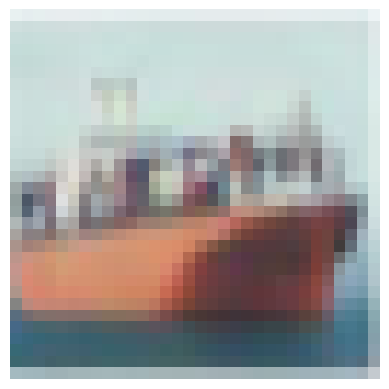

Top 16 Nearest Neighbors (in latent space)


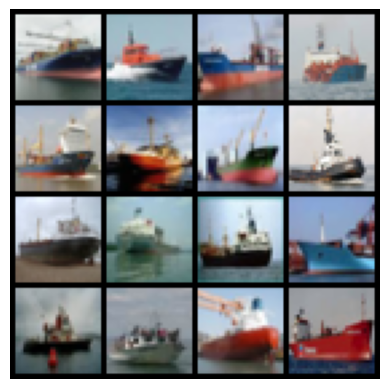

Image 2


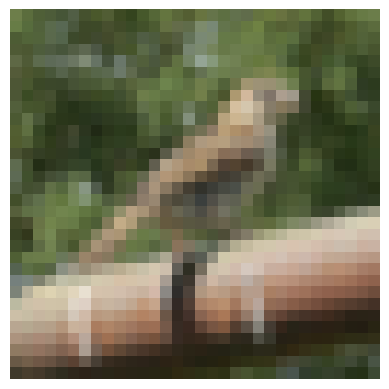

Top 16 Nearest Neighbors (in latent space)


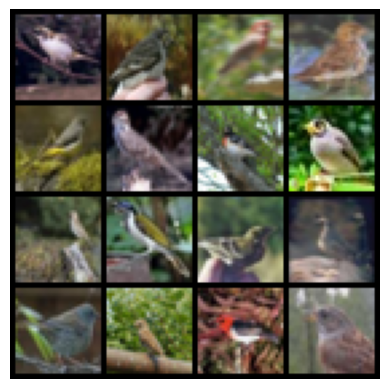

Image 3


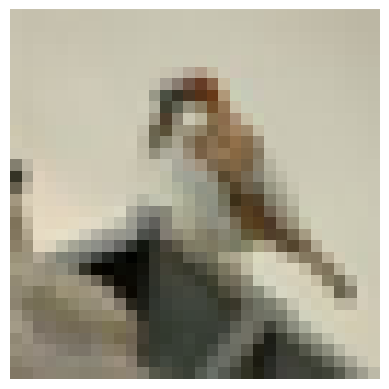

Top 16 Nearest Neighbors (in latent space)


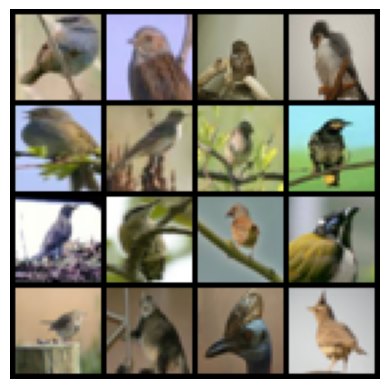

Image 4


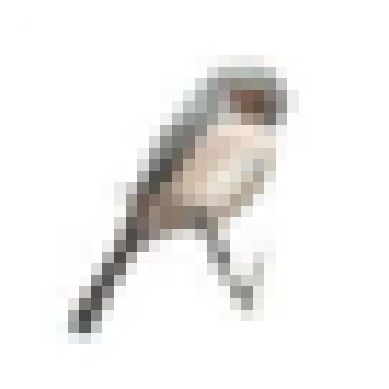

Top 16 Nearest Neighbors (in latent space)


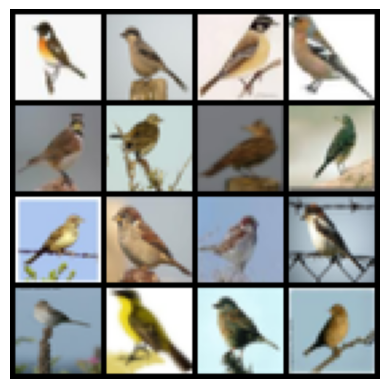

In [14]:
display_nearest_neighbors('simclr', model, test_loader)

## Other Tasks
In addition to the above tasks, prior work has also investigated other self-superivsed tasks such as solving jigsaw puzzles [[4]](https://arxiv.org/abs/1603.09246), cycle-consistency [[5]](https://arxiv.org/abs/1903.07593), contrastive learning [[6]](https://arxiv.org/abs/1807.03748)[[7]](https://arxiv.org/abs/1905.09272)[[8]](https://arxiv.org/abs/1906.05849)[[9]](https://arxiv.org/abs/1911.05722), and patch prediction [[10]](https://arxiv.org/abs/1505.05192). See [here](https://github.com/jason718/awesome-self-supervised-learning) for a great resource on more self-supervised learning papers.

# Demo 4: Using Representations for Downstream Tasks

After pretraining a model on a self-supervised learning task, we can use it for other downstream tasks. In this demo, we use the pre-trained ResNet50 backbone from training SimCLR on a subset of ImageNet to learn a semantic segmentation model on Pascal VOC 2012. We use a simple U-Net [[11]](https://arxiv.org/abs/1505.04597) architecture with skip connections across feature maps between the SimCLR encoder and learned upsampling decoder. We do not fine-tune the SimCLR ResNet50 backbone, and only optimize the upsampling portion.

![](https://drive.google.com/uc?id=19dxxcwof0IA0jyv0VCl4rnZZf3ajA22s)

The training script can be found in `train_segmentation.py` [here](https://github.com/wilson1yan/cs294-158-ssl/blob/master/train_segmentation.py).

## Example Code

In [15]:
# Code adapted from https://github.com/qubvel/segmentation_models.pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F
from deepul_helper.resnet import NormReLU

class SegmentationModel(nn.Module):
    metrics = ['Loss']
    metrics_fmt = [':.4e']

    def __init__(self, n_classes):
        super().__init__()

        decoder_channels = (512, 256, 128, 64, 32)
        encoder_channels = (2048, 1024, 512, 256, 64) # Starting from head (resnet 50)

        # Construct decoder blocks
        in_channels = [encoder_channels[0]] + list(decoder_channels[:-1])
        skip_channels = list(encoder_channels[1:]) + [0]
        out_channels = decoder_channels
        blocks = [
            DecoderBlock(in_ch, skip_ch, out_ch)
            for in_ch, skip_ch, out_ch in zip(in_channels, skip_channels, out_channels)
        ]
        self.dec_blocks = nn.ModuleList(blocks)

        # Segmentation head for output prediction
        self.seg_head = nn.Conv2d(decoder_channels[-1], n_classes, kernel_size=3, padding=1)

    def forward(self, features, targets):
        features = features[1:] # remove first skip with same spatial resolution
        features = features[::-1] # reverse channels to start from head of encoder

        skips = features[1:]
        x = features[0]
        for i, decoder_block in enumerate(self.dec_blocks):
            skip = skips[i] if i < len(skips) else None
            x = decoder_block(x, skip)

        logits = self.seg_head(x)
        loss = F.cross_entropy(logits, targets)

        return dict(Loss=loss), logits


class DecoderBlock(nn.Module):
    def __init__(
            self,
            in_channels,
            skip_channels,
            out_channels,
    ):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels + skip_channels, out_channels,
                      kernel_size=3, padding=1),
            NormReLU((out_channels, None, None)), # only care about channel dim for BN
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            NormReLU((out_channels, None, None))
        )

    def forward(self, x, skip=None):
        x = F.interpolate(x, scale_factor=2, mode="nearest")
        if skip is not None:
            x = torch.cat([x, skip], dim=1)
        x = self.conv1(x)
        x = self.conv2(x)
        return x

## Segmentation Results
Below, we show a random subset of segmentations from the trained model. Every set of 3 images consists of the original image, the labeled segmentation, and the predicted segmentation.

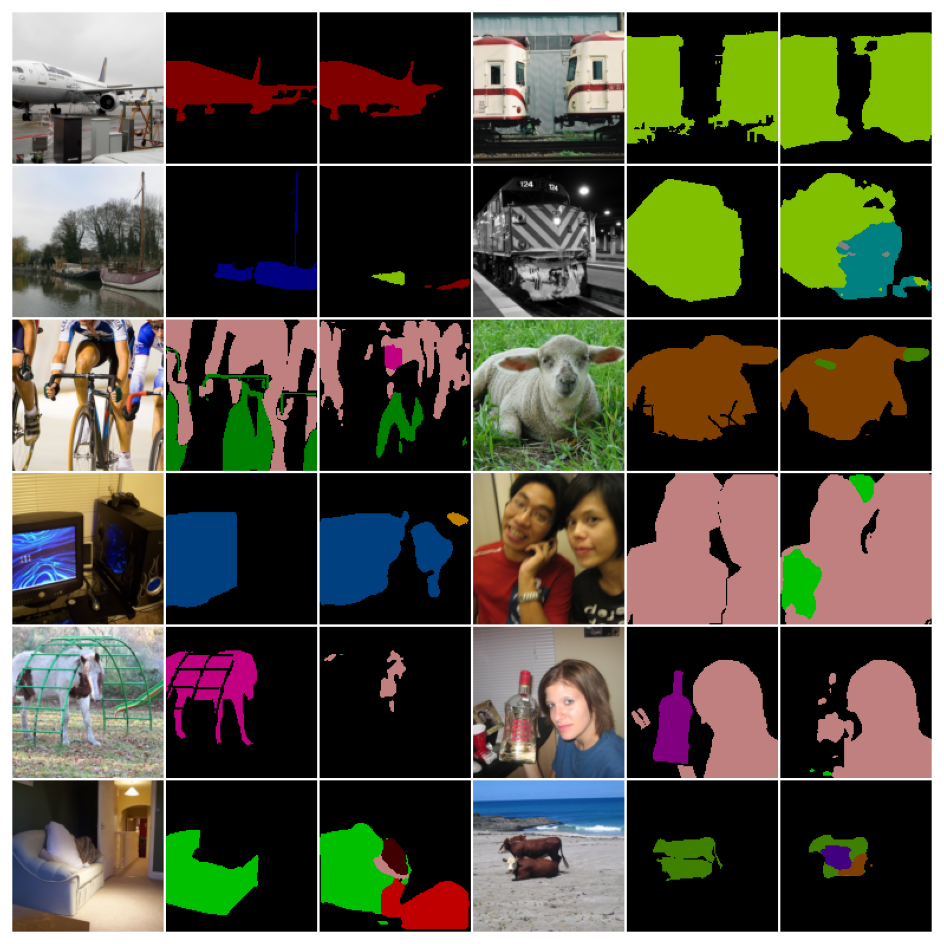

In [16]:
from deepul_helper.demos import show_segmentation
show_segmentation()

# Demo 5: Avoiding Trivial Representations in Self-Supervised Tasks

When designing a self-supervised learning task, it is important to make sure that no trivial solutions exists. In general, a learned solution is trivial if the model is able to successfully complete its task by taking advantage of low-level features. As a result, it doesn't learn a good representation so downstream performance is bad.

For example, in the jigsaw [[4]](https://arxiv.org/abs/1603.09246) task, a model can "cheat" by just looking at the boundary textures of the jigsaw pieces, or following and matching straight lines across different pieces. These issues can generally be fixed by ranndom cropping, shifting, and spacially jittering.

We look at two other less obvious aspects of images that may reduce performance.

## Chromatic Aberration

Chromatic aberration occurs when the different focal lengths of light results in the light not meeting all at the same point.
![from wikipedia](https://drive.google.com/uc?id=1PYGoQWnH0aAeiE_8t4ef5WDcq1UIQQ5t)

A example of very apparent chromatic aberration is shown below, where the green and magenta colors are clearly offset with each other:

![](https://drive.google.com/uc?id=1M1B6kV6ddBwyJse3FQT8_XBTeqs5s5WL)

Chromatic aberration generally becomes a problem in patch-based self-supervised learning tasks that design, such as solving jigsaw puzzles, or predicintg the correct location of a patch in an image In this case, the model can take advantage of the low-level chromatic aberration features to get a strong idea of where the patch is located without understanding the actual context.

Below is a quick demo of chromatic aberration in more realistic images, and possible fixes. Note that in general, chromatic aberration is fairly hard to spot with the naked eye, but deep learning models are still able to use it to their advantage.

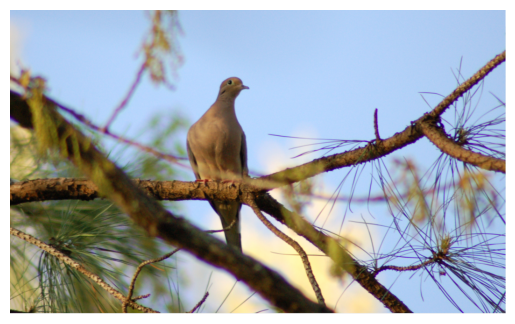

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

# You can see some chromatic aberration in the purple fringes around the branches

image = Image.open('sample_images/chrom_ab_demo.png')
plt.figure()
plt.axis('off')
plt.imshow(image)
plt.show()

Chromatic aberration is generally fixed through conversion to grayscale, or color dropping. Color dropping works by dropping 2 of the color channels and replacing them with random noise uniform or Gaussian noise.

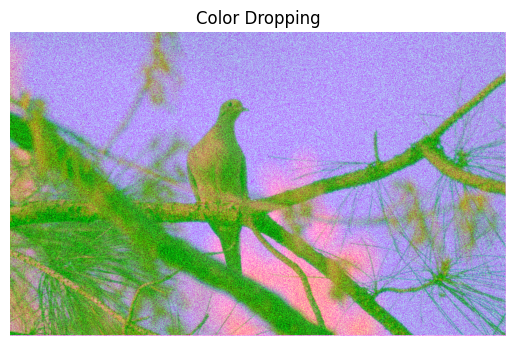

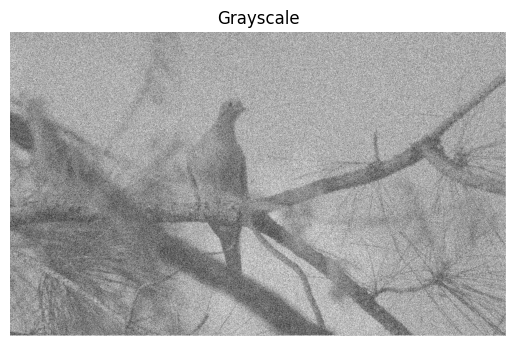

In [18]:
import numpy as np

# Color Dropping
# We will drop all channels except R
image_cpy = image.copy()
pixels = image_cpy.load()

arr = np.array(image_cpy)
std_R = np.std(arr[:, :, 0])
mean_G, mean_B = np.mean(arr[:, :, 1]), np.mean(arr[:, :, 2])

for i in range(image.size[0]):
  for j in range(image.size[1]):
    p = pixels[i, j] # (R, G, B, A)
    R, A = p[0], p[3]
    G = int(np.random.randn() * std_R + mean_G)
    B = int(np.random.randn() * std_R + mean_B)
    pixels[i, j] = (R, G, p[2], p[3])

plt.figure()
plt.title('Color Dropping')
plt.axis('off')
plt.imshow(image_cpy)
plt.show()

# Grayscale
image_cpy2 = image.copy()
pixels2 = image_cpy2.load()

for i in range(image.size[0]):
  for j in range(image.size[1]):
    p = pixels[i, j]
    G = int(0.3 * p[0] + 0.59 * p[1] + 0.11 * p[2])
    pixels2[i, j] = (G, G, G, 255)

plt.figure()
plt.title('Grayscale')
plt.axis('off')
plt.imshow(image_cpy2)
plt.show()

## Color Intensity Histograms

In the SimCLR paper, the authors show that the histogram of color intensities of different patches within the same image have very similar histograms, which may degrade training by encouraging models to look at low-level (pixel intensity) features to solve self-supervised tasks that involve matching positive patches of the same image.

Below, we run a similar demo to what was demonstrated in the paper

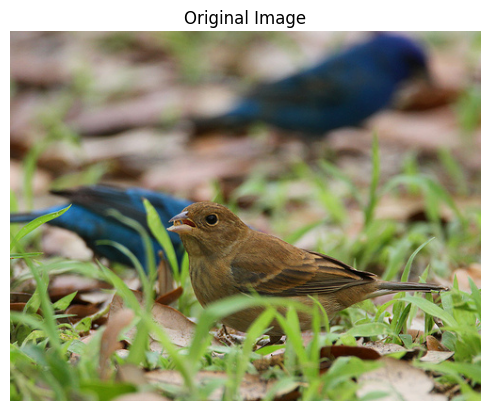

In [19]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('sample_images/n01537544_19414.JPEG')
plt.figure()
plt.title('Original Image')
plt.axis('off')
plt.imshow(image)
plt.show()

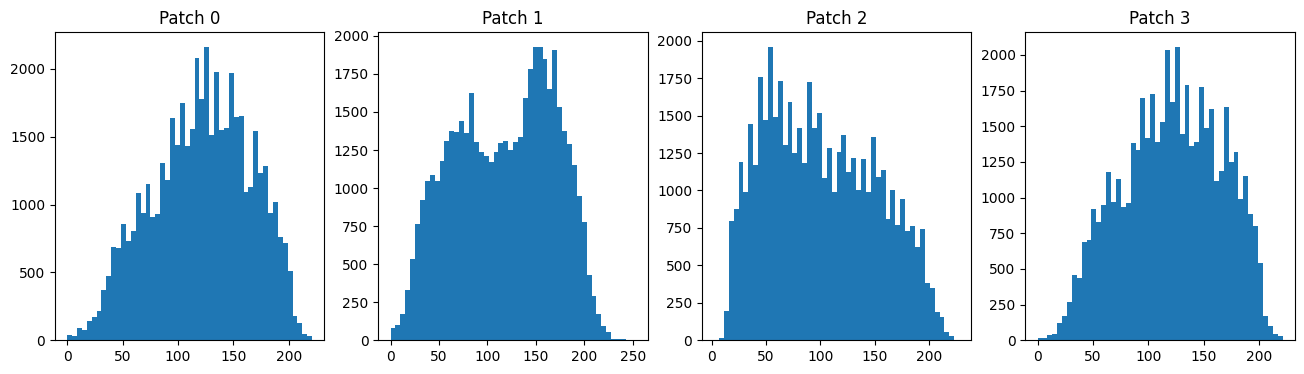

In [20]:
import numpy as np
arr = np.array(image)
H, W, _ = arr.shape

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
  r = np.random.randint(0, H - 128)
  c = np.random.randint(0, W - 128)
  patch = arr[r:r+128, c:c+128]

  axs[i].set_title(f'Patch {i}')
  axs[i].hist(patch.reshape(-1), bins=50)
plt.show()

Now we apply color jittering to mitigate this effect

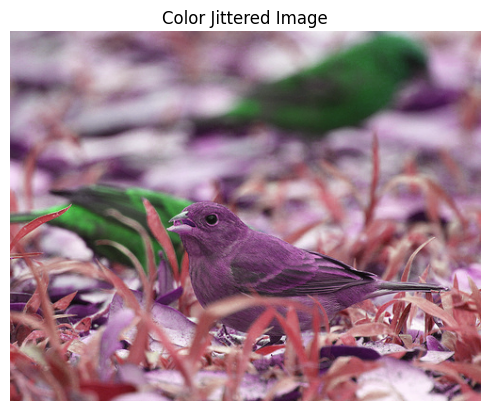

In [21]:
from torchvision import transforms

color_jitter = transforms.ColorJitter(0.3, 0.3, 0.3, 0.3)
jitter_img = color_jitter(image)

image = Image.open('sample_images/n01537544_19414.JPEG')
plt.figure()
plt.title('Color Jittered Image')
plt.axis('off')
plt.imshow(jitter_img)
plt.show()

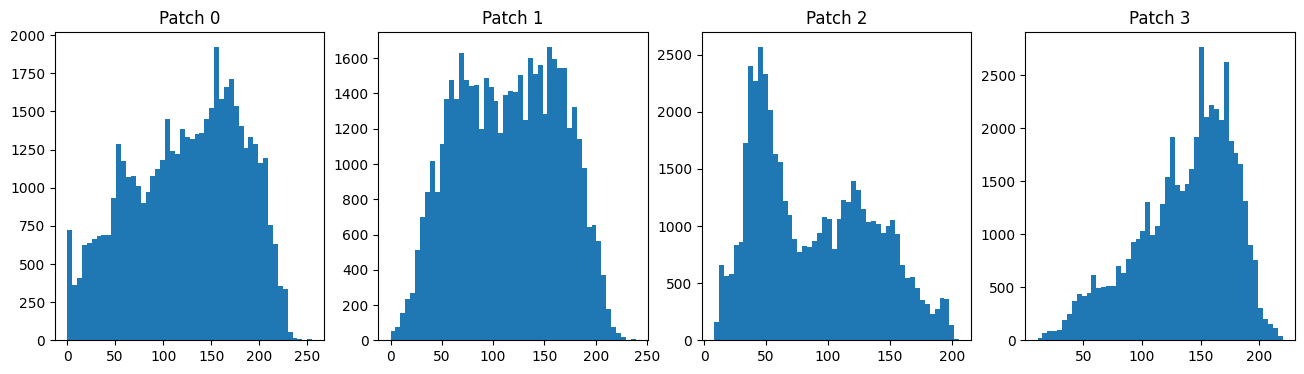

In [22]:
arr = np.array(image)
H, W, _ = arr.shape

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
  r = np.random.randint(0, H - 128)
  c = np.random.randint(0, W - 128)
  patch = arr[r:r+128, c:c+128]

  axs[i].set_title(f'Patch {i}')
  axs[i].hist(patch.reshape(-1), bins=50)
plt.show()

# Question 3 : Comparaison des performances

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Tâche Prétexte': ['Context Encoder', 'Rotation Prediction', 'SimCLR'],
    'Top 1 Accuracy (Train Set)': ['53.236%', '79.27%', '89.952%'],
    'Top 5 Accuracy (Train Set)': ['94.094%', '99.244%', '99.47%'],
    'Top 1 Accuracy (Test Set)': ['45.77%', '79.91%', '92.84%'],
    'Top 5 Accuracy (Test Set)': ['90.29%', '99.12%', '99.86%']
}

df = pd.DataFrame(data)
df.head()

Tâche Prétexte Top 1 Accuracy (Train Set) Top 5 Accuracy (Train Set)  \
0      Context Encoder                    53.236%                    94.094%   
1  Rotation Prediction                     79.27%                    99.244%   
2               SimCLR                    89.952%                     99.47%   

  Top 1 Accuracy (Test Set) Top 5 Accuracy (Test Set)  
0                    45.77%                    90.29%  
1                    79.91%                    99.12%  
2                    92.84%                    99.86%

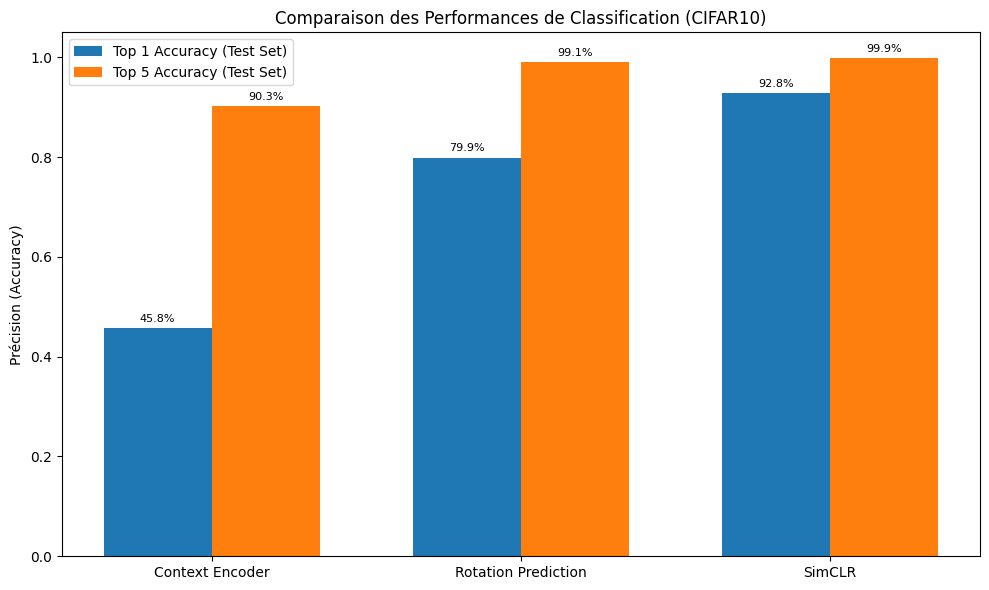

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def percentage_to_float(percent_str):
    return float(percent_str.strip('%')) / 100

# Convert percentage strings to floats
df['Top 1 Acc (Test)'] = df['Top 1 Accuracy (Test Set)'].apply(percentage_to_float)
df['Top 5 Acc (Test)'] = df['Top 5 Accuracy (Test Set)'].apply(percentage_to_float)

tasks = df['Tâche Prétexte']
top1_acc = df['Top 1 Acc (Test)']
top5_acc = df['Top 5 Acc (Test)']

x = np.arange(len(tasks))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, top1_acc, width, label='Top 1 Accuracy (Test Set)', color='#1f77b4')
rects2 = ax.bar(x + width/2, top5_acc, width, label='Top 5 Accuracy (Test Set)', color='#ff7f0e')

ax.set_ylabel('Précision (Accuracy)')
ax.set_title('Comparaison des Performances de Classification (CIFAR10)')
ax.set_xticks(x)
ax.set_xticklabels(tasks)
ax.legend()
ax.set_ylim(0, 1.05)

def autolabel(rects, data_series):
    for rect, value in zip(rects, data_series):
        height = rect.get_height()
        ax.annotate(f'{value:.1%}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

autolabel(rects1, top1_acc)
autolabel(rects2, top5_acc)

plt.tight_layout()
plt.show()


# Question 4: Comparaison sur STL-10

## Importing data.py and demos.py files

In [29]:
# data.py
import os.path as osp
import random

import numpy as np
import cv2

import torchvision.transforms.functional as F
from torchvision import datasets
from torchvision import transforms


def get_transform(dataset, task, train=True):
    transform = None
    if task == 'context_encoder':
        if dataset == 'cifar10':
            transform = transforms.Compose([
                transforms.Resize(128),
                transforms.ToTensor(),
                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
            ])
        elif 'imagenet' in dataset:
            transform = transforms.Compose([
                transforms.Resize(350),
                transforms.RandomCrop(128),
                transforms.ToTensor(),
                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
            ])

        elif dataset == 'stl10':
            transform = transforms.Compose([
                transforms.Resize(128),
                transforms.ToTensor(),
                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])

    elif task == 'rotation':
        if dataset == 'cifar10':
            if train:
                transform = transforms.Compose([
                    transforms.RandomCrop(32, padding=4),
                    transforms.RandomHorizontalFlip(),
                    transforms.ToTensor(),
                    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
                ])
            else:
                transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
                ])
        elif dataset == 'stl10':
            if train:
                transform = transforms.Compose([
                    transforms.RandomCrop(32, padding=4),
                    transforms.RandomHorizontalFlip(),
                    transforms.ToTensor(),
                    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
                ])
            else:
                transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
                ])

        elif 'imagenet' in dataset:
            if train:
                transform = transforms.Compose([
                    transforms.RandomResizedCrop(224),
                    transforms.RandomHorizontalFlip(),
                    transforms.ToTensor(),
                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                ])
            else:
                transform = transforms.Compose([
                    transforms.Resize(256),
                    transforms.CenterCrop(224),
                    transforms.ToTensor(),
                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                ])
    elif task == 'cpc':
        if train:
            transform = transforms.Compose([
                transforms.RandomResizedCrop(256),
                transforms.RandomHorizontalFlip(),
                transforms.RandomApply([transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8),
                transforms.RandomGrayscale(p=0.2),
                transforms.ToTensor(),
                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
            ])
        else:
            transform = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(256),
                transforms.ToTensor(),
                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
            ])
    elif task == 'simclr':
        if dataset == 'cifar10':
            if train:
                transform = transforms.Compose([
                    transforms.RandomResizedCrop(32),
                    transforms.RandomHorizontalFlip(p=0.5),
                    transforms.RandomApply([transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8),
                    transforms.RandomGrayscale(p=0.2),
                    transforms.ToTensor(),
                    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
                ])
            else:
                transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
                ])
        elif dataset == 'stl10':
            if train:
                transform = transforms.Compose([
                    transforms.RandomResizedCrop(32),
                    transforms.RandomHorizontalFlip(p=0.5),
                    transforms.RandomApply([transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8),
                    transforms.RandomGrayscale(p=0.2),
                    transforms.ToTensor(),
                    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
                ])
            else:
                transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
                ])

        elif 'imagenet' in dataset:
            if train:
                transform = transforms.Compose([
                    transforms.RandomResizedCrop(128),
                    transforms.RandomHorizontalFlip(),
                    transforms.RandomApply([transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8),
                    transforms.RandomGrayscale(p=0.2),
                    GaussianBlur(kernel_size=11),
                    transforms.ToTensor(),
                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                ])
            else:
                transform = transforms.Compose([
                    transforms.Resize(128),
                    transforms.CenterCrop(128),
                    transforms.ToTensor(),
                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                ])
        transform = SimCLRDataTransform(transform)
    elif task == 'segmentation':
        if train:
            transform = MultipleCompose([
                MultipleRandomResizedCrop(128),
                MultipleRandomHorizontalFlip(),
                RepeatTransform(transforms.ToTensor()),
                GroupTransform([
                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
                    SegTargetTransform()])
            ])
        else:
            transform = MultipleCompose([
                RepeatTransform(transforms.Resize(128)),
                RepeatTransform(transforms.CenterCrop(128)),
                RepeatTransform(transforms.ToTensor()),
                GroupTransform([
                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
                    SegTargetTransform()])
            ])
    else:
        raise Exception('Invalid task:', task)

    return transform


def get_datasets(dataset, task):
    if 'imagenet' in dataset:
        train_dir = osp.join('data', dataset, 'train')
        val_dir = osp.join('data', dataset, 'val')
        train_dataset = datasets.ImageFolder(
            train_dir,
            get_transform(dataset, task, train=True)
        )

        val_dataset = datasets.ImageFolder(
            val_dir,
            get_transform(dataset, task, train=False)
        )

        return train_dataset, val_dataset, len(train_dataset.classes)
    elif dataset == 'cifar10':
        train_dset = datasets.CIFAR10(osp.join('data', dataset), train=True,
                                      transform=get_transform(dataset, task, train=True),
                                      download=True)
        test_dset = datasets.CIFAR10(osp.join('data', dataset), train=False,
                                     transform=get_transform(dataset, task, train=False),
                                     download=True)
        return train_dset, test_dset, len(train_dset.classes)

    elif dataset == 'stl10':
        train_dset = datasets.STL10(osp.join('data', dataset), split='train',
                                      transform=get_transform(dataset, task, train=True),
                                      download=True)

        test_dset = datasets.STL10(osp.join('data', dataset), split='test',
                                     transform=get_transform(dataset, task, train=False),
                                     download=True)
        return train_dset, test_dset, len(train_dset.classes)

    elif dataset == 'pascalvoc2012':
        train_dset = datasets.VOCSegmentation(osp.join('data', dataset), image_set='train',
                                              transforms=get_transform(dataset, task, train=True),
                                              download=True)
        test_dset = datasets.VOCSegmentation(osp.join('data', dataset), image_set='val',
                                             transforms=get_transform(dataset, task, train=False),
                                             download=True)
        return train_dset, test_dset, 21
    else:
        raise Exception('Invalid dataset:', dataset)


# https://github.com/sthalles/SimCLR/blob/master/data_aug/gaussian_blur.py
class GaussianBlur(object):
    # Implements Gaussian blur as described in the SimCLR paper
    def __init__(self, kernel_size, min=0.1, max=2.0):
        self.min = min
        self.max = max
        # kernel size is set to be 10% of the image height/width
        self.kernel_size = kernel_size

    def __call__(self, sample):
        sample = np.array(sample)

        # blur the image with a 50% chance
        prob = np.random.random_sample()

        if prob < 0.5:
            sigma = (self.max - self.min) * np.random.random_sample() + self.min
            sample = cv2.GaussianBlur(sample, (self.kernel_size, self.kernel_size), sigma)

        return sample


class SimCLRDataTransform(object):
    def __init__(self, transform):
        self.transform = transform

    def __call__(self, sample):
        xi = self.transform(sample)
        xj = self.transform(sample)
        return xi, xj

# Re-written torchvision transforms to support operations on multiple inputs
# Needed to maintain consistency on random transforms with real images and their segmentations
class MultipleCompose(object):
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, *inputs):
        for t in self.transforms:
            inputs = t(*inputs)
        return inputs


class GroupTransform(object):
    """ Applies a list of transforms elementwise """
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, *inputs):
        assert len(inputs) == len(self.transforms)
        outputs = [t(inp) for t, inp in zip(self.transforms, inputs)]
        return outputs

class MultipleRandomResizedCrop(transforms.RandomResizedCrop):

    def __call__(self, *imgs):
        """
        Args:
            imgs (List of PIL Image): Images to be cropped and resized.
                                      Assumes they are all the same size

        Returns:
            PIL Images: Randomly cropped and resized images.
        """
        i, j, h, w = self.get_params(imgs[0], self.scale, self.ratio)
        return [F.resized_crop(img, i, j, h, w, self.size, self.interpolation)
                for img in imgs]

class MultipleRandomHorizontalFlip(transforms.RandomHorizontalFlip):
    def __call__(self, *imgs):
        if random.random() < self.p:
            return [F.hflip(img) for img in imgs]
        return imgs

class RepeatTransform(object):
    def __init__(self, transform):
        self.transform = transform

    def __call__(self, *inputs):
        return [self.transform(inp) for inp in inputs]

class SegTargetTransform(object):
    def __call__(self, target):
        target *= 255.
        target[target > 20] = 0
        return target.long()

In [30]:
# demos.py
import os.path as osp

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import torch
import torch.utils.data as data
from torchvision import datasets
from torchvision.utils import make_grid

#from deepul_helper.data import get_datasets
from deepul_helper.tasks import *
from deepul_helper.utils import accuracy, unnormalize, remove_module_state_dict, seg_idxs_to_color
from deepul_helper.seg_model import SegmentationModel


def load_model_and_data(task, dataset='stl10'):
    cifar_10_dataset='cifar10'
    _, test_dset, n_classes = get_datasets(dataset, task)
    test_loader = data.DataLoader(test_dset, batch_size=128, num_workers=4,
                                  pin_memory=True, shuffle=True)

    ckpt_pth = osp.join('results', f'cifar10_{task}', 'model_best.pth.tar')
    #ckpt = torch.load(ckpt_pth, map_location='cpu')
    ckpt = torch.load(ckpt_pth, map_location='cpu',weights_only=False)


    if task == 'context_encoder':
        model = ContextEncoder(cifar_10_dataset,n_classes)
    elif task == 'rotation':
        model = RotationPrediction(cifar_10_dataset, n_classes)
    elif task == 'simclr':
        model = SimCLR(cifar_10_dataset, n_classes, None)
    model.load_state_dict(remove_module_state_dict(ckpt['state_dict']))

    model.cuda()
    model.eval()

    linear_classifier = model.construct_classifier()
    linear_classifier.load_state_dict(remove_module_state_dict(ckpt['state_dict_linear']))

    linear_classifier.cuda()
    linear_classifier.eval()

    return model, linear_classifier, test_loader


def evaluate_accuracy(model, linear_classifier, test_loader):
    #train_acc1, train_acc5 = evaluate_classifier(model, linear_classifier, train_loader)
    test_acc1, test_acc5 = evaluate_classifier(model, linear_classifier, test_loader)

    print('Test Set')
    print(f'Top 1 Accuracy: {test_acc1}, Top 5 Accuracy: {test_acc5}\n')


def evaluate_classifier(model, linear_classifier, loader):
    correct1, correct5 = 0, 0
    with torch.no_grad():
        for images, target in loader:
            images = images_to_cuda(images)
            target = target.cuda(non_blocking=True)
            out, zs = model(images)

            logits = linear_classifier(zs)
            acc1, acc5 = accuracy(logits, target, topk=(1, 5))

            correct1 += acc1.item() * logits.shape[0]
            correct5 += acc5.item() * logits.shape[0]
    total = len(loader.dataset)

    return correct1 / total, correct5 / total


def display_nearest_neighbors(task, model, loader, n_examples=4, k=16):
    with torch.no_grad():
        all_images, all_zs = [], []
        for i, (images, _) in enumerate(loader):
            images = images_to_cuda(images)
            if task == 'simclr':
                images = images[0]
            zs = model.encode(images)

            images = images.cpu()
            zs = zs.cpu()

            if i == 0:
                ref_zs = zs[:n_examples]
                ref_images = images[:n_examples]
                all_zs.append(zs[n_examples:])
                all_images.append(images[n_examples:])
            else:
                all_zs.append(zs)
                all_images.append(images)
        all_images = torch.cat(all_images, dim=0)
        all_zs = torch.cat(all_zs, dim=0)

        aa = (ref_zs ** 2).sum(dim=1).unsqueeze(dim=1)
        ab = torch.matmul(ref_zs, all_zs.t())
        bb = (all_zs ** 2).sum(dim=1).unsqueeze(dim=0)
        dists = torch.sqrt(aa - 2 * ab + bb)

        idxs = torch.topk(dists, k, dim=1, largest=False)[1]
        sel_images = torch.index_select(all_images, 0, idxs.view(-1))
        sel_images = unnormalize(sel_images.cpu(), 'stl10')
        sel_images = sel_images.view(n_examples, k, *sel_images.shape[-3:])

        ref_images = unnormalize(ref_images.cpu(), 'stl10')
        ref_images = (ref_images.permute(0, 2, 3, 1) * 255.).numpy().astype('uint8')

        for i in range(n_examples):
            print(f'Image {i + 1}')
            plt.figure()
            plt.axis('off')
            plt.imshow(ref_images[i])
            plt.show()

            grid_img = make_grid(sel_images[i], nrow=4)
            grid_img = (grid_img.permute(1, 2, 0) * 255.).numpy().astype('uint8')

            print(f'Top {k} Nearest Neighbors (in latent space)')
            plt.figure()
            plt.axis('off')
            plt.imshow(grid_img)
            plt.show()


def images_to_cuda(images):
    if isinstance(images, (tuple, list)):
        images = [x.cuda(non_blocking=True) for x in images]
    else:
        images = images.cuda(non_blocking=True)
    return images


def show_context_encoder_inpainting():
    model, _, test_loader = load_model_and_data('context_encoder', 'stl10')
    images = next(iter(test_loader))[0][:8]
    with torch.no_grad():
        images = images.cuda(non_blocking=True)
        images_masked, images_recon = model.reconstruct(images)
        images_masked = unnormalize(images_masked.cpu(), 'stl10')
        images_recon = unnormalize(images_recon.cpu(), 'stl10')

        images = torch.stack((images_masked, images_recon), dim=1).flatten(end_dim=1)

        grid_img = make_grid(images, nrow=4)
        grid_img = (grid_img.permute(1, 2, 0) * 255.).numpy().astype('uint8')

        plt.figure()
        plt.axis('off')
        plt.imshow(grid_img)
        plt.show()


def show_segmentation():
    _, val_dset, n_classes = get_datasets('pascalvoc2012', 'segmentation')
    val_loader = data.DataLoader(val_dset, batch_size=128)

    pretrained_model = SimCLR('imagenet100', 100, None)
    ckpt = torch.load(osp.join('results', 'imagenet100_simclr', 'seg_model_best.pth.tar'),
                      map_location='cpu')
    pretrained_model.load_state_dict(ckpt['pt_state_dict'])
    pretrained_model.cuda().eval()

    seg_model = SegmentationModel(n_classes)
    seg_model.load_state_dict(ckpt['state_dict'])
    seg_model.cuda().eval()

    images, target = next(iter(val_loader))
    images, target = images[:12], target[:12]
    images = images.cuda(non_blocking=True)
    target = target.cuda(non_blocking=True).long().squeeze(1)
    features = pretrained_model.get_features(images)
    _, logits = seg_model(features, target)
    pred = torch.argmax(logits, dim=1)

    target = seg_idxs_to_color(target.cpu(), 'palette.pkl')
    pred = seg_idxs_to_color(pred.cpu(), 'palette.pkl')
    images = unnormalize(images.cpu(), 'imagenet')

    to_show = torch.stack((images, target, pred), dim=1).flatten(end_dim=1)
    to_show = make_grid(to_show, nrow=6, pad_value=1.)
    to_show = (to_show.permute(1, 2, 0) * 255.).numpy().astype('uint8')

    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(to_show)
    plt.show()

## Démo 1 : Context Encoder

In [31]:
model, linear_classifier, test_loader = load_model_and_data('context_encoder')
evaluate_accuracy(model, linear_classifier, test_loader)

100%|██████████| 2.64G/2.64G [01:17<00:00, 34.0MB/s]
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Test Set
Top 1 Accuracy: 15.625, Top 5 Accuracy: 60.8



## Démo 2 : Rotation Prediction

In [32]:
model, linear_classifier, test_loader = load_model_and_data('rotation')
evaluate_accuracy(model, linear_classifier, test_loader)

RuntimeError: running_mean should contain 110592 elements not 12288

## Démo 3 : SimCLR

In [33]:
model, linear_classifier, test_loader = load_model_and_data('simclr')
evaluate_accuracy(model, linear_classifier,test_loader)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Test Set
Top 1 Accuracy: 36.7875, Top 5 Accuracy: 65.075



# Question 5 : Tâche Prétexte: Prédiction de Position Relative de Patches

## CIFAR 10

In [34]:

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

# Configuration
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 128
EPOCHS_PRETEXT = 10
EPOCHS_CLASSIFICATION = 50
LEARNING_RATE = 0.001


PATCH_SIZE = 10  # Taille de chaque patch
GAP = 2  # Espace entre les patches

class RelativePatchPositionDataset(Dataset):
    """
    Dataset pour la tâche de prédiction de position relative de patches.

    Le patch central est le patch requête.
    On extrait un second patch parmi les 8 positions possibles autour du patch central.
    Le modèle doit prédire quelle position relative (0-7) correspond au second patch.

    Positions:
    0 1 2
    3 X 4    (X = patch central/requête)
    5 6 7
    """

    def __init__(self, base_dataset, patch_size=10, gap=2):
        self.base_dataset = base_dataset
        self.patch_size = patch_size
        self.gap = gap


        self.center_offset = patch_size + gap

        # Positions relatives des 8 patches autour du centre
        self.relative_positions = [
            (0, 0),                              # Position 0: haut-gauche
            (0, patch_size + gap),               # Position 1: haut-centre
            (0, 2 * (patch_size + gap)),         # Position 2: haut-droite
            (patch_size + gap, 0),               # Position 3: centre-gauche
            (patch_size + gap, 2 * (patch_size + gap)),  # Position 4: centre-droite
            (2 * (patch_size + gap), 0),         # Position 5: bas-gauche
            (2 * (patch_size + gap), patch_size + gap),  # Position 6: bas-centre
            (2 * (patch_size + gap), 2 * (patch_size + gap))  # Position 7: bas-droite
        ]

    def __len__(self):
        return len(self.base_dataset)

    def __getitem__(self, idx):
        # Récupérer l'image originale
        img, _ = self.base_dataset[idx]

        # Convertir en tensor
        if not isinstance(img, torch.Tensor):
            img = transforms.ToTensor()(img)

        # Vérification d'image est assez grande
        _, h, w = img.shape
        required_size = 3 * self.patch_size + 2 * self.gap

        if h < required_size or w < required_size:
            # Redimensionner
            img = transforms.Resize((required_size, required_size))(img)


        _, h, w = img.shape
        max_y = h - required_size
        max_x = w - required_size

        start_y = random.randint(0, max(0, max_y))
        start_x = random.randint(0, max(0, max_x))

        # Extraire le patch central (requête)
        center_y = start_y + self.center_offset
        center_x = start_x + self.center_offset
        center_patch = img[:, center_y:center_y + self.patch_size,
                          center_x:center_x + self.patch_size]

        # Choisir une position relative aléatoire (0-7)
        relative_position = random.randint(0, 7)

        # Extraire le patch à cette position relative
        rel_y, rel_x = self.relative_positions[relative_position]
        target_y = start_y + rel_y
        target_x = start_x + rel_x
        target_patch = img[:, target_y:target_y + self.patch_size,
                          target_x:target_x + self.patch_size]

        return center_patch, target_patch, relative_position

    def visualize_sample(self, idx):
        """Visualise un exemple de la tâche"""
        center_patch, target_patch, position = self[idx]

        fig, axes = plt.subplots(1, 3, figsize=(12, 4))

        # Patch central
        axes[0].imshow(center_patch.permute(1, 2, 0))
        axes[0].set_title('Patch Requête (Centre)', fontweight='bold')
        axes[0].axis('off')

        # Patch cible
        axes[1].imshow(target_patch.permute(1, 2, 0))
        axes[1].set_title(f'Patch Cible (Position {position})', fontweight='bold')
        axes[1].axis('off')

        # Schéma des positions
        position_names = ['↖️ 0', '⬆️ 1', '↗️ 2',
                         '⬅️ 3', '❌', '➡️ 4',
                         '↙️ 5', '⬇️ 6', '↘️ 7']
        grid = np.array(position_names).reshape(3, 3)

        axes[2].text(0.5, 0.5, f'Position prédite:\n{position_names[position]}',
                    ha='center', va='center', fontsize=16, fontweight='bold')
        axes[2].axis('off')

        plt.tight_layout()
        plt.savefig('patch_position_example.png', dpi=150, bbox_inches='tight')
        plt.show()
        print(f"Position relative: {position}")




In [35]:
class PatchEncoder(nn.Module):
    """
    Encoder pour extraire les features d'un patch.
    Architecture simple avec convolutions.
    """
    def __init__(self, patch_size=10, feature_dim=128):
        super(PatchEncoder, self).__init__()

        self.features = nn.Sequential(
            # Conv1
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),  # patch_size // 2

            # Conv2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),  # patch_size // 4

            # Conv3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
        )

        # Calcul de la taille après convolutions
        self.feature_size = 256 * (patch_size // 4) * (patch_size // 4)

        self.fc = nn.Sequential(
            nn.Linear(self.feature_size, feature_dim),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x




In [36]:
class RelativePositionPredictor(nn.Module):
    """
    Modèle complet pour prédire la position relative.
    Utilise deux encoders (avec poids partagés) pour les deux patches,
    puis prédit la position relative.
    """
    def __init__(self, patch_size=10, feature_dim=128, num_positions=8):
        super(RelativePositionPredictor, self).__init__()

        self.encoder = PatchEncoder(patch_size, feature_dim)

        # Classifier pour prédire la position (0-7)
        self.classifier = nn.Sequential(
            nn.Linear(feature_dim * 2, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256, num_positions)
        )

    def forward(self, center_patch, target_patch):
        # Encoder les deux patches
        center_features = self.encoder(center_patch)
        target_features = self.encoder(target_patch)

        # Concaténer les features
        combined = torch.cat([center_features, target_features], dim=1)

        # Prédire la position relative
        output = self.classifier(combined)
        return output

    def get_encoder(self):
        """Retourne l'encoder pour l'évaluation downstream"""
        return self.encoder


def train_pretext_task(model, train_loader, epochs=10):
    """
    Entraîne le modèle sur la tâche prétexte de prédiction de position relative.
    """
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    model.train()

    train_losses = []
    train_accuracies = []

    print("Début de l'entraînement sur la tâche prétexte.")

    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0

        pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}')
        for center_patch, target_patch, position in pbar:
            center_patch = center_patch.to(DEVICE)
            target_patch = target_patch.to(DEVICE)
            position = position.to(DEVICE)

            optimizer.zero_grad()

            # Forward pass
            output = model(center_patch, target_patch)
            loss = criterion(output, position)

            # Backward pass
            loss.backward()
            optimizer.step()

            # Statistiques
            total_loss += loss.item()
            _, predicted = output.max(1)
            total += position.size(0)
            correct += predicted.eq(position).sum().item()

            pbar.set_postfix({'loss': loss.item(), 'acc': 100.*correct/total})

        epoch_loss = total_loss / len(train_loader)
        epoch_acc = 100. * correct / total

        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f'Epoch [{epoch+1}/{epochs}] - Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.2f}%')


        if (epoch + 1) % 20 == 0:
            torch.save(model.state_dict(), f'relative_position_model_epoch_{epoch+1}.pth')

    # Visualisation de l'entraînement
    plot_training_curves(train_losses, train_accuracies)

    return model, train_losses, train_accuracies


def plot_training_curves(losses, accuracies):
    """Visualise les courbes d'entraînement"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Loss
    ax1.plot(losses, linewidth=2)
    ax1.set_xlabel('Epoch', fontweight='bold')
    ax1.set_ylabel('Loss', fontweight='bold')
    ax1.set_title('Training Loss', fontweight='bold')
    ax1.grid(alpha=0.3)

    # Accuracy
    ax2.plot(accuracies, linewidth=2, color='green')
    ax2.set_xlabel('Epoch', fontweight='bold')
    ax2.set_ylabel('Accuracy (%)', fontweight='bold')
    ax2.set_title('Training Accuracy', fontweight='bold')
    ax2.grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig('relative_position_training_curves.png', dpi=150, bbox_inches='tight')
    plt.show()




In [37]:
# Classifieur linéaire pour évaluation downstream
class LinearClassifier(nn.Module):
    def __init__(self, input_dim, num_classes=10):
        super(LinearClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)


def evaluate_on_classification(encoder, train_loader, test_loader, num_classes=10):
    """
    Évalue l'encoder pré-entraîné sur une tâche de classification (downstream).
    """
    print("\n" + "="*50)
    print("ÉVALUATION SUR TÂCHE DE CLASSIFICATION")
    print("="*50)

    class FullImageEncoder(nn.Module):
        def __init__(self, patch_encoder):
            super(FullImageEncoder, self).__init__()
            self.patch_encoder = patch_encoder
            self.adapt = nn.AdaptiveAvgPool2d((PATCH_SIZE // 4, PATCH_SIZE // 4))

        def forward(self, x):
            # Passer par les convolutions du patch encoder
            x = self.patch_encoder.features(x)
            # Adapter la taille spatiale
            x = self.adapt(x)
            x = x.view(x.size(0), -1)
            # Passer par le FC mais recalculer la dimension
            if not hasattr(self, 'fc_adapted'):
                input_dim = x.shape[1]
                self.fc_adapted = nn.Linear(input_dim, 128).to(DEVICE)
                # Copier les poids si possible
                with torch.no_grad():
                    if input_dim <= self.patch_encoder.fc[0].in_features:
                        self.fc_adapted.weight[:, :input_dim] = self.patch_encoder.fc[0].weight[:, :input_dim]
            return self.fc_adapted(x)

    # Créer l'encoder adapté
    adapted_encoder = FullImageEncoder(encoder).to(DEVICE)
    adapted_encoder.eval()

    # Extraire les features
    def extract_features(dataloader):
        features_list = []
        labels_list = []

        with torch.no_grad():
            for images, labels in tqdm(dataloader, desc="Extraction features"):
                images = images.to(DEVICE)
                feat = adapted_encoder(images)
                features_list.append(feat.cpu())
                labels_list.append(labels)

        return torch.cat(features_list), torch.cat(labels_list)

    print("Extraction des features d'entraînement...")
    train_features, train_labels = extract_features(train_loader)

    print("Extraction des features de test...")
    test_features, test_labels = extract_features(test_loader)

    input_dim = train_features.shape[1]

    # Entraîner un classifieur linéaire
    print(f"\nEntraînement du classifieur linéaire (dim={input_dim})...")
    classifier = LinearClassifier(input_dim, num_classes).to(DEVICE)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(classifier.parameters(), lr=0.001)

    # Dataset pour les features
    train_dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_feat_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

    classifier.train()
    for epoch in range(EPOCHS_CLASSIFICATION):
        total_loss = 0
        correct = 0
        total = 0

        for feat, labels in train_feat_loader:
            feat, labels = feat.to(DEVICE), labels.to(DEVICE)

            optimizer.zero_grad()
            outputs = classifier(feat)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        if (epoch + 1) % 10 == 0:
            acc = 100. * correct / total
            print(f'Epoch [{epoch+1}/{EPOCHS_CLASSIFICATION}] - Loss: {total_loss/len(train_feat_loader):.4f}, Acc: {acc:.2f}%')

    # Évaluation finale
    classifier.eval()
    test_dataset = torch.utils.data.TensorDataset(test_features, test_labels)
    test_feat_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    correct = 0
    total = 0

    with torch.no_grad():
        for feat, labels in test_feat_loader:
            feat, labels = feat.to(DEVICE), labels.to(DEVICE)
            outputs = classifier(feat)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100. * correct / total
    print(f"\n{'='*50}")
    print(f"EXACTITUDE FINALE SUR LE TEST: {accuracy:.2f}%")
    print(f"{'='*50}\n")

    return accuracy


# Script principal
def main():
    print(f"Utilisation du device: {DEVICE}\n")

    # Transformations simples
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    # Charger CIFAR10
    print("Chargement de CIFAR10...")
    cifar_train = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    cifar_test = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

    # Créer le dataset de patches pour la tâche prétexte
    print("Création du dataset de prédiction de position relative...")
    patch_dataset = RelativePatchPositionDataset(cifar_train, patch_size=PATCH_SIZE, gap=GAP)
    patch_loader = DataLoader(patch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

    # Visualiser un exemple
    print("\nVisualisation d'un exemple:")
    patch_dataset.visualize_sample(0)

    # Créer le modèle
    print("\nCréation du modèle...")
    model = RelativePositionPredictor(patch_size=PATCH_SIZE, feature_dim=128).to(DEVICE)
    print(f"Nombre de paramètres: {sum(p.numel() for p in model.parameters()):,}")

    # Entraîner sur la tâche prétexte
    model, losses, accuracies = train_pretext_task(model, patch_loader, epochs=EPOCHS_PRETEXT)

    # Sauvegarder le modèle final
    torch.save(model.state_dict(), 'relative_position_model_final.pth')
    torch.save(model.get_encoder().state_dict(), 'relative_position_encoder.pth')
    print("\nModèle sauvegardé!")

    # Évaluation sur la classification CIFAR10
    print("\nÉvaluation downstream sur CIFAR10...")
    train_loader_cls = DataLoader(cifar_train, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
    test_loader_cls = DataLoader(cifar_test, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

    encoder = model.get_encoder()
    accuracy = evaluate_on_classification(encoder, train_loader_cls, test_loader_cls, num_classes=10)

    print(f"\n Pipeline terminé!")
    print(f"Exactitude finale de classification: {accuracy:.2f}%")

    return model, accuracy


if __name__ == "__main__":
    model, accuracy = main()

    print("\n" + "="*50)
    print("FICHIERS GÉNÉRÉS:")
    print("="*50)
    print("- relative_position_model_final.pth (modèle complet)")
    print("- relative_position_encoder.pth (encoder seul)")
    print("- patch_position_example.png (exemple de tâche)")
    print("- relative_position_training_curves.png (courbes d'entraînement)")
    print("="*50)

Utilisation du device: cuda

Chargement de CIFAR10...


100%|██████████| 170M/170M [00:03<00:00, 43.2MB/s]


Création du dataset de prédiction de position relative...

Visualisation d'un exemple:
Position relative: 7

Création du modèle...
Nombre de paramètres: 570,760
Début de l'entraînement sur la tâche prétexte.


Epoch 1/10: 100%|██████████| 391/391 [00:26<00:00, 15.02it/s, loss=1.76, acc=25.2]


Epoch [1/10] - Loss: 1.8892, Acc: 25.19%


Epoch 2/10: 100%|██████████| 391/391 [00:24<00:00, 15.67it/s, loss=1.47, acc=39.1]


Epoch [2/10] - Loss: 1.6157, Acc: 39.13%


Epoch 3/10: 100%|██████████| 391/391 [00:30<00:00, 12.70it/s, loss=1.55, acc=44.3]


Epoch [3/10] - Loss: 1.4917, Acc: 44.25%


Epoch 4/10: 100%|██████████| 391/391 [00:22<00:00, 17.06it/s, loss=1.41, acc=46.9]


Epoch [4/10] - Loss: 1.4180, Acc: 46.85%


Epoch 5/10: 100%|██████████| 391/391 [00:23<00:00, 16.73it/s, loss=1.44, acc=49]


Epoch [5/10] - Loss: 1.3660, Acc: 48.99%


Epoch 6/10: 100%|██████████| 391/391 [00:27<00:00, 14.18it/s, loss=1.16, acc=51.4]


Epoch [6/10] - Loss: 1.2996, Acc: 51.39%


Epoch 7/10: 100%|██████████| 391/391 [00:24<00:00, 16.08it/s, loss=1.21, acc=52.1]


Epoch [7/10] - Loss: 1.2787, Acc: 52.12%


Epoch 8/10: 100%|██████████| 391/391 [00:25<00:00, 15.38it/s, loss=1.27, acc=54]


Epoch [8/10] - Loss: 1.2344, Acc: 54.04%


Epoch 9/10: 100%|██████████| 391/391 [00:25<00:00, 15.28it/s, loss=1.21, acc=55.4]


Epoch [9/10] - Loss: 1.1932, Acc: 55.44%


Epoch 10/10: 100%|██████████| 391/391 [00:25<00:00, 15.64it/s, loss=1.09, acc=56.9]


Epoch [10/10] - Loss: 1.1601, Acc: 56.88%

Modèle sauvegardé!

Évaluation downstream sur CIFAR10...

ÉVALUATION SUR TÂCHE DE CLASSIFICATION
Extraction des features d'entraînement...


Extraction features: 100%|██████████| 391/391 [00:11<00:00, 33.28it/s]


Extraction des features de test...


Extraction features: 100%|██████████| 79/79 [00:02<00:00, 34.66it/s]



Entraînement du classifieur linéaire (dim=128)...
Epoch [10/50] - Loss: 1.5630, Acc: 45.13%
Epoch [20/50] - Loss: 1.4906, Acc: 47.76%
Epoch [30/50] - Loss: 1.4487, Acc: 49.58%
Epoch [40/50] - Loss: 1.4212, Acc: 50.39%
Epoch [50/50] - Loss: 1.4020, Acc: 51.16%

EXACTITUDE FINALE SUR LE TEST: 50.59%


 Pipeline terminé!
Exactitude finale de classification: 50.59%

FICHIERS GÉNÉRÉS:
- relative_position_model_final.pth (modèle complet)
- relative_position_encoder.pth (encoder seul)
- patch_position_example.png (exemple de tâche)
- relative_position_training_curves.png (courbes d'entraînement)


## STL10

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm

# Configuration
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 128
EPOCHS_CLASSIFICATION = 10
LEARNING_RATE = 0.001
PATCH_SIZE = 10


class PatchEncoder(nn.Module):
    """Encoder pour extraire les features d'un patch."""
    def __init__(self, patch_size=10, feature_dim=128):
        super(PatchEncoder, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
        )

        self.feature_size = 256 * (patch_size // 4) * (patch_size // 4)

        self.fc = nn.Sequential(
            nn.Linear(self.feature_size, feature_dim),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


class FullImageEncoder(nn.Module):
    """Wrapper pour adapter l'encoder pré-entraîné aux images complètes de STL-10 (96x96)."""
    def __init__(self, patch_encoder, target_size=96):
        super(FullImageEncoder, self).__init__()
        self.patch_encoder = patch_encoder
        self.adapt = nn.AdaptiveAvgPool2d((PATCH_SIZE // 4, PATCH_SIZE // 4))
        self.fc_adapted = None

    def forward(self, x):
        # Passer par les convolutions du patch encoder
        x = self.patch_encoder.features(x)
        # Adapter la taille spatiale
        x = self.adapt(x)
        x = x.view(x.size(0), -1)

        # Créer le FC adapté si nécessaire
        if self.fc_adapted is None:
            input_dim = x.shape[1]
            self.fc_adapted = nn.Linear(input_dim, 128).to(x.device)
            # Initialiser avec les poids du patch encoder si possible
            with torch.no_grad():
                if input_dim <= self.patch_encoder.fc[0].in_features:
                    self.fc_adapted.weight[:, :input_dim] = self.patch_encoder.fc[0].weight[:, :input_dim]

        return self.fc_adapted(x)


class LinearClassifier(nn.Module):
    """Classifieur linéaire pour évaluation downstream."""
    def __init__(self, input_dim, num_classes=10):
        super(LinearClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)


def load_stl10_data():
    """Charge le dataset STL-10."""
    print("Chargement de STL-10...")

    # Transformations pour STL-10 (images 96x96)
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    # Charger STL-10 (train et test)
    stl10_train = datasets.STL10(
        root='./data',
        split='train',  # 5000 images
        download=True,
        transform=transform
    )

    stl10_test = datasets.STL10(
        root='./data',
        split='test',   # 8000 images
        download=True,
        transform=transform
    )

    print(f"STL-10 Train: {len(stl10_train)} images")
    print(f"STL-10 Test: {len(stl10_test)} images")

    return stl10_train, stl10_test


def extract_features(encoder, dataloader):
    """Extrait les features pour tous les échantillons."""
    encoder.eval()
    features_list = []
    labels_list = []

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="Extraction features"):
            images = images.to(DEVICE)
            feat = encoder(images)
            features_list.append(feat.cpu())
            labels_list.append(labels)

    return torch.cat(features_list), torch.cat(labels_list)


def train_linear_classifier(train_features, train_labels, test_features, test_labels, num_classes=10):
    """Entraîne un classifieur linéaire sur les features extraites."""
    input_dim = train_features.shape[1]

    print(f"\nEntraînement du classifieur linéaire (dim={input_dim})...")
    classifier = LinearClassifier(input_dim, num_classes).to(DEVICE)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(classifier.parameters(), lr=LEARNING_RATE)

    # Dataset pour les features
    train_dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

    test_dataset = torch.utils.data.TensorDataset(test_features, test_labels)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    train_accuracies = []
    test_accuracies = []

    # Entraînement
    classifier.train()
    for epoch in range(EPOCHS_CLASSIFICATION):
        total_loss = 0
        correct = 0
        total = 0

        for feat, labels in train_loader:
            feat, labels = feat.to(DEVICE), labels.to(DEVICE)

            optimizer.zero_grad()
            outputs = classifier(feat)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_acc = 100. * correct / total
        train_accuracies.append(train_acc)

        # Évaluation sur test
        classifier.eval()
        test_correct = 0
        test_total = 0

        with torch.no_grad():
            for feat, labels in test_loader:
                feat, labels = feat.to(DEVICE), labels.to(DEVICE)
                outputs = classifier(feat)
                _, predicted = outputs.max(1)
                test_total += labels.size(0)
                test_correct += predicted.eq(labels).sum().item()

        test_acc = 100. * test_correct / test_total
        test_accuracies.append(test_acc)
        classifier.train()

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{EPOCHS_CLASSIFICATION}] - '
                  f'Loss: {total_loss/len(train_loader):.4f}, '
                  f'Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%')

    # Évaluation finale
    classifier.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for feat, labels in test_loader:
            feat, labels = feat.to(DEVICE), labels.to(DEVICE)
            outputs = classifier(feat)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    final_accuracy = 100. * correct / total

    return final_accuracy, train_accuracies, test_accuracies


def plot_accuracy_curves(train_accs, test_accs):
    """Visualise les courbes d'accuracy."""
    plt.figure(figsize=(10, 6))
    plt.plot(train_accs, label='Train Accuracy', linewidth=2)
    plt.plot(test_accs, label='Test Accuracy', linewidth=2)
    plt.xlabel('Epoch', fontweight='bold')
    plt.ylabel('Accuracy (%)', fontweight='bold')
    plt.title('STL-10 Classification Accuracy', fontweight='bold')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('stl10_accuracy_curves.png', dpi=150, bbox_inches='tight')
    plt.show()


def main():
    """Pipeline complet pour évaluer sur STL-10."""
    print(f"Utilisation du device: {DEVICE}\n")


    stl10_train, stl10_test = load_stl10_data()

    train_loader = DataLoader(stl10_train, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
    test_loader = DataLoader(stl10_test, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

    # Charger l'encoder pré-entraîné
    print("\nChargement de l'encoder pré-entraîné...")
    patch_encoder = PatchEncoder(patch_size=PATCH_SIZE, feature_dim=128)

    try:
        patch_encoder.load_state_dict(torch.load('relative_position_encoder.pth', map_location=DEVICE))
        print("✓ Encoder chargé depuis 'relative_position_encoder.pth'")
    except FileNotFoundError:
        print("⚠ Fichier 'relative_position_encoder.pth' non trouvé.")
        print("Assurez-vous d'avoir d'abord entraîné le modèle sur CIFAR-10.")
        return

    adapted_encoder = FullImageEncoder(patch_encoder, target_size=96).to(DEVICE)
    adapted_encoder.eval()

    print("\n" + "="*60)
    print("ÉVALUATION SUR STL-10")
    print("="*60)

    # Extraire les features
    print("\nExtraction des features d'entraînement...")
    train_features, train_labels = extract_features(adapted_encoder, train_loader)

    print("Extraction des features de test...")
    test_features, test_labels = extract_features(adapted_encoder, test_loader)

    # Entraîner et évaluer le classifieur
    final_accuracy, train_accs, test_accs = train_linear_classifier(
        train_features, train_labels,
        test_features, test_labels,
        num_classes=10
    )

    # Visualiser les courbes
    plot_accuracy_curves(train_accs, test_accs)

    print(f"\n{'='*60}")
    print(f"EXACTITUDE FINALE SUR STL-10 TEST: {final_accuracy:.2f}%")
    print(f"{'='*60}\n")

    # Comparaison des datasets
    print("\n" + "="*60)
    print("INFORMATIONS SUR LES DATASETS")
    print("="*60)
    print("CIFAR-10: 32x32 pixels, 50k train / 10k test")
    print("STL-10:   96x96 pixels, 5k train / 8k test")
    print("Classes:  Similaires mais pas identiques")
    print("="*60)

    return final_accuracy


if __name__ == "__main__":
    accuracy = main()

    print("\n" + "="*60)
    print("FICHIERS GÉNÉRÉS:")
    print("="*60)
    print("- stl10_accuracy_curves.png (courbes d'apprentissage)")
    print("="*60)
    print("\nNote: STL-10 a moins d'images d'entraînement (5k vs 50k)")
    print("mais des résolutions plus élevées (96x96 vs 32x32).")

Utilisation du device: cuda

Chargement de STL-10...


100%|██████████| 2.64G/2.64G [00:57<00:00, 46.1MB/s]


STL-10 Train: 5000 images
STL-10 Test: 8000 images

Chargement de l'encoder pré-entraîné...
✓ Encoder chargé depuis 'relative_position_encoder.pth'

ÉVALUATION SUR STL-10

Extraction des features d'entraînement...


Extraction features: 100%|██████████| 40/40 [00:03<00:00, 13.09it/s]


Extraction des features de test...


Extraction features: 100%|██████████| 63/63 [00:06<00:00, 10.32it/s]



Entraînement du classifieur linéaire (dim=128)...
Epoch [10/10] - Loss: 1.8086, Train Acc: 34.90%, Test Acc: 36.11%

EXACTITUDE FINALE SUR STL-10 TEST: 36.11%


INFORMATIONS SUR LES DATASETS
CIFAR-10: 32x32 pixels, 50k train / 10k test
STL-10:   96x96 pixels, 5k train / 8k test
Classes:  Similaires mais pas identiques

FICHIERS GÉNÉRÉS:
- stl10_accuracy_curves.png (courbes d'apprentissage)

Note: STL-10 a moins d'images d'entraînement (5k vs 50k)
mais des résolutions plus élevées (96x96 vs 32x32).


# Question 6 : Evaluation des performances

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = [
    ('Demo 1 Context Encoder',  '45.77%',  '15.625%'),
    ('Demo 2 Rotation Prediction',  '79.91%', '_'),
    ('Demo 3 SimCLR',   '92.84%', '36.788%'),
    ('Demo 4 Relative Position',   '50.59%', '36.11%')
]

headers = ['Pretext Task', 'Accuracy on CIFAR10', 'Accuracy on STL10']

df = pd.DataFrame(data, columns=headers)

df.head()


Pretext Task Accuracy on CIFAR10 Accuracy on STL10
0      Demo 1 Context Encoder              45.77%           15.625%
1  Demo 2 Rotation Prediction              79.91%                 _
2               Demo 3 SimCLR              92.84%           36.788%
3    Demo 4 Relative Position              50.59%            36.11%

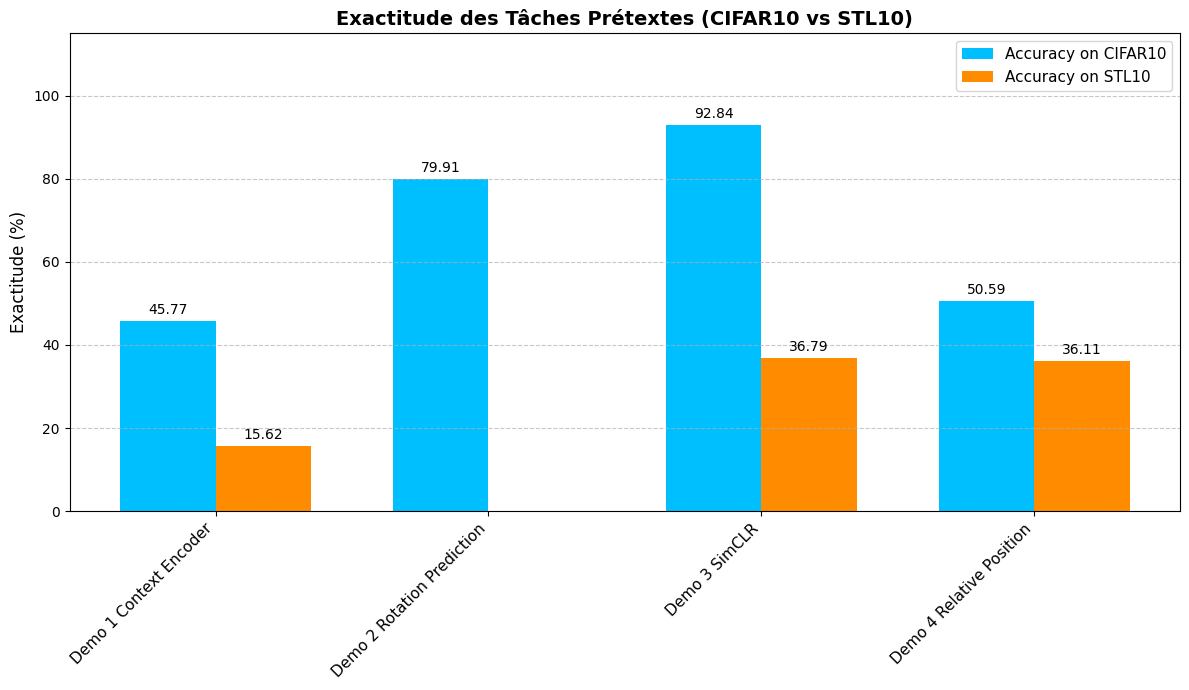

In [8]:

df_cleaned = df.copy()
def clean_accuracy(value):
    if isinstance(value, str):
        value = value.replace('%', '')
        value = value.replace('_', 'nan')

    return pd.to_numeric(value, errors='coerce')

df_cleaned['Accuracy on CIFAR10'] = df_cleaned['Accuracy on CIFAR10'].apply(clean_accuracy)
df_cleaned['Accuracy on STL10'] = df_cleaned['Accuracy on STL10'].apply(clean_accuracy)

tasks = df_cleaned['Pretext Task']
cifar10_acc = df_cleaned['Accuracy on CIFAR10']
stl10_acc = df_cleaned['Accuracy on STL10']

x = np.arange(len(tasks))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))

rects1 = ax.bar(x - width/2, cifar10_acc, width, label='Accuracy on CIFAR10', color='deepskyblue')
rects2 = ax.bar(x + width/2, stl10_acc, width, label='Accuracy on STL10', color='darkorange')


ax.set_ylabel('Exactitude (%)', fontsize=12)
ax.set_title('Exactitude des Tâches Prétextes (CIFAR10 vs STL10)', fontsize=14, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(tasks, rotation=45, ha='right', fontsize=11)

ax.legend(fontsize=11)

ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')

ax.set_ylim(0, 115)

ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()